In [17]:
import tensorflow as tf
from numpy import unique, argmax
from tensorflow.keras.datasets import mnist
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, Conv2D, MaxPooling2D, Flatten, Dropout

In [18]:
(x_train,y_train), (x_test,y_test) = mnist.load_data()

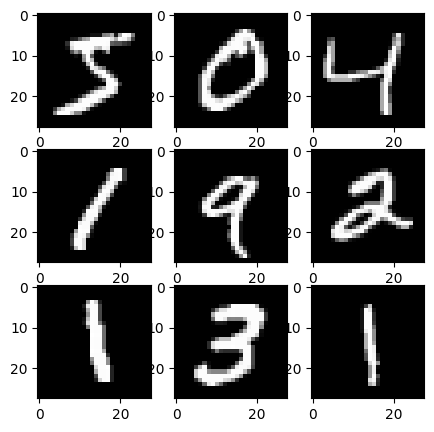

In [19]:
import matplotlib.pyplot as plt

plt.figure(figsize=(5,5))
for i in range(9):
	# define subplot
	plt.subplot(3, 3, i+1)
	# plot raw pixel data
	plt.imshow(x_train[i], cmap=plt.get_cmap('gray'))
plt.show()

In [20]:
# Data Preprocessing

# Single channel
x_train = x_train.reshape(x_train.shape[0],x_train.shape[1],x_train.shape[2],1)
x_test = x_test.reshape(x_test.shape[0],x_test.shape[1],x_test.shape[2],1)

# Normalization Imgae data
x_train = x_train.astype('float32')/255
x_test = x_test.astype('float32')/255

# One hot encoding
# y_train = tf.keras.utils.to_categorical(y_train, 10)
# y_test = tf.keras.utils.to_categorical(y_test, 10)

In [22]:
in_shape = x_train.shape[1:]
n_classes = len(unique(y_train))

In [38]:
# Define model
model = Sequential()
model.add(Conv2D(32, (3,3), activation='relu', kernel_initializer='he_uniform', input_shape=in_shape))
model.add(MaxPooling2D((2, 2)))
model.add(Flatten())
model.add(Dense(100, activation='relu', kernel_initializer='he_uniform'))
model.add(Dropout(0.5))
model.add(Dense(n_classes, activation='softmax'))

# Define loss and optimizer
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])


In [39]:
# Fit the model
hist = model.fit(x_train, y_train, epochs=10, batch_size=128, verbose=1, validation_split=0.3)

Epoch 1/10
329/329 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.8025 - loss: 0.6339 - val_accuracy: 0.9664 - val_loss: 0.1114
Epoch 2/10
329/329 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.9501 - loss: 0.1691 - val_accuracy: 0.9758 - val_loss: 0.0761
Epoch 3/10
329/329 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.9680 - loss: 0.1073 - val_accuracy: 0.9787 - val_loss: 0.0689
Epoch 4/10
329/329 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.9734 - loss: 0.0888 - val_accuracy: 0.9811 - val_loss: 0.0614
Epoch 5/10
329/329 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.9777 - loss: 0.0744 - val_accuracy: 0.9812 - val_loss: 0.0597
Epoch 6/10
329/329 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.9810 - loss: 0.0587 - val_accuracy: 0.9833 - val_loss: 0.0555
Epoch 7/10
329/329 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.9836 - loss: 0.0522 - val_accuracy: 0.9835 - val_loss: 0.0556
Epoch 8/10
329/329 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.9849 - loss: 0.0482 - val_accuracy: 0.

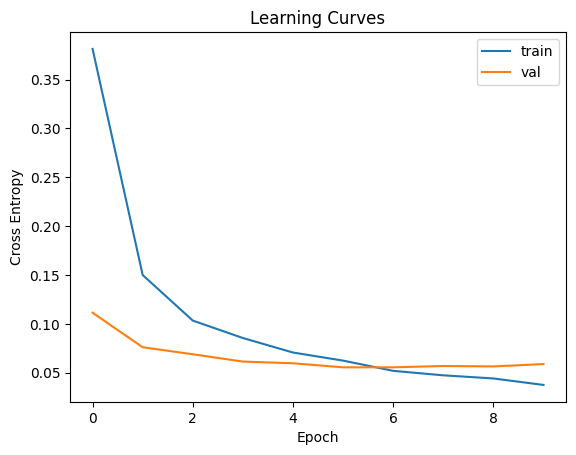

In [40]:
# Plot Learning Curves
plt.title('Learning Curves')
plt.xlabel('Epoch')
plt.ylabel('Cross Entropy')
plt.plot(hist.history['loss'], label='train')
plt.plot(hist.history['val_loss'], label='val')
plt.legend()
plt.show()

In [26]:
loss, acc = model.evaluate(x_test, y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 902us/step - accuracy: 0.9837 - loss: 0.0537


In [28]:
acc

0.9879999756813049

In [33]:
pred = argmax(model.predict(x_test), axis=1)

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 905us/step


In [34]:
pred

array([7, 2, 1, ..., 4, 5, 6])

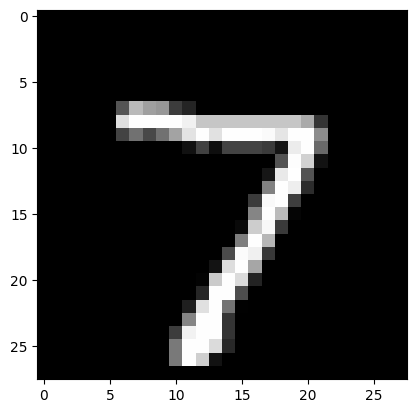

In [36]:
plt.imshow(x_test[0], cmap=plt.get_cmap('gray'))